<a href="https://colab.research.google.com/github/harshendrashah/Digit_Recognition/blob/master/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognition using Keras

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

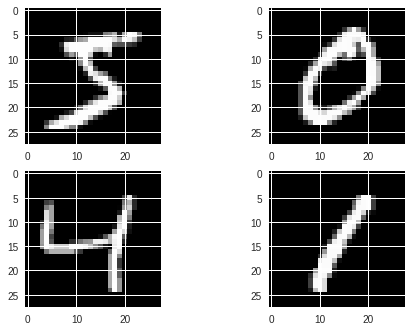

In [23]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

## Convert 28*28 images to a vector of length 784

In [26]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_test.shape

(10000, 784)

In [27]:
X_train.shape

(60000, 784)

## Normalize inputs from 0-255 to 0-1

In [0]:
X_train = X_train / 255
X_test = X_test / 255

## One hot encode outputs

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Baseline Model

In [0]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [49]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2856 - acc: 0.9188 - val_loss: 0.1417 - val_acc: 0.9583
Epoch 2/10
 - 7s - loss: 0.1119 - acc: 0.9672 - val_loss: 0.1009 - val_acc: 0.9710
Epoch 3/10
 - 7s - loss: 0.0720 - acc: 0.9793 - val_loss: 0.0796 - val_acc: 0.9756
Epoch 4/10
 - 7s - loss: 0.0507 - acc: 0.9853 - val_loss: 0.0753 - val_acc: 0.9770
Epoch 5/10
 - 7s - loss: 0.0365 - acc: 0.9901 - val_loss: 0.0655 - val_acc: 0.9792
Epoch 6/10
 - 7s - loss: 0.0266 - acc: 0.9931 - val_loss: 0.0655 - val_acc: 0.9797
Epoch 7/10
 - 7s - loss: 0.0198 - acc: 0.9952 - val_loss: 0.0640 - val_acc: 0.9806
Epoch 8/10
 - 7s - loss: 0.0146 - acc: 0.9968 - val_loss: 0.0588 - val_acc: 0.9824
Epoch 9/10
 - 7s - loss: 0.0113 - acc: 0.9976 - val_loss: 0.0647 - val_acc: 0.9808
Epoch 10/10
 - 7s - loss: 0.0082 - acc: 0.9985 - val_loss: 0.0614 - val_acc: 0.9821
Baseline Error: 1.79%
